In [133]:
import random
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [134]:
def Binomial_func(x, N=10, p=0.5):
    if isinstance(x, list):
        x = np.array(x)
    if isinstance(x, np.ndarray):
        N = np.full_like(x, N)
    #print(f"Binomial_func)():: {k = }, \n {N = }, \n{scipy.special.comb(N, k) = }")
    #conb_ = scipy.special.comb(N, k)
    return scipy.special.comb(N, x) * p**x * (1-p)**(N-x)

def BinomialMeanSigma(n, p):
    mean = n * p
    sigma = np.sqrt(n * p * (1-p))
    return mean, sigma

def NormalnDistribution(x, mu, sigma):
    factr0 = 1 / (sigma * math.sqrt(2*math.pi))
    factr1 = (x - mu)**2 / (2.0 * sigma**2)
    return factr0 * np.exp(-1 * factr1)

def CDF_NormalDist(x, mu, sigma):
    if isinstance(x, list):
        x = np.array(x)
    return 1./2 * (1 +  scipy.special.erf( (x-mu) / (sigma * math.sqrt(2)) ) )

def CDFInverse(probability, mu, sigma):
    x_lo     = mu - 6 * sigma 
    x_hi     = mu + 6 * sigma
    while 0==0:
        x_ = (x_hi + x_lo) / 2
        p_ = CDF_NormalDist(x_, mu=mu, sigma=sigma)
        #print(f"CDFInverse: {x_ = }, {p_ = }, {x_lo = }, {x_hi = }")
        if abs(p_ - probability) < 1e-3: break
        if p_ >= probability:  x_hi = x_
        else:                  x_lo = x_

    return x_ 


/var/folders/2l/c4141kzj2r34tjwfn3fh6nd40000gr/T/ipykernel_13853/2811469159.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


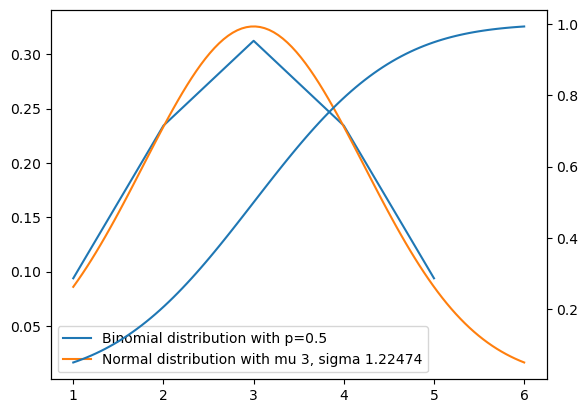

In [135]:
fig, axs = plt.subplots()

N = 6
x           = np.arange(1,N)
xFiner      = np.linspace(1,N, max(100, N*3))
f_Binomal   = Binomial_func(x, N=N)
mu0, sigma0 = BinomialMeanSigma(n=N, p=0.5)
f_Normal  = NormalnDistribution(xFiner, mu=mu0, sigma=sigma0)
axs.plot(x,f_Binomal, label="Binomial distribution with p=0.5")
axs.plot(xFiner,f_Normal, label="Normal distribution with mu %g, sigma %g"%(mu0, sigma0))

axs_1 = axs.twinx()
axs_1.plot(xFiner,CDF_NormalDist(xFiner, mu=mu0, sigma=sigma0), label="CDF Normal distribution with mu %g, sigma %g"%(mu0, sigma0))

#axs.set_xlim(400, 600)
axs.legend()
fig.show()

/var/folders/2l/c4141kzj2r34tjwfn3fh6nd40000gr/T/ipykernel_13853/1429135303.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


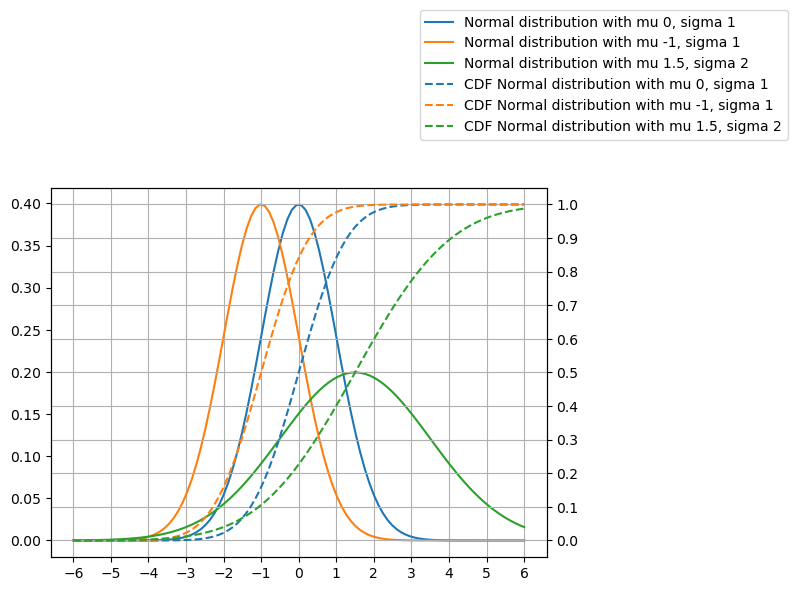

In [136]:
## plot Normal distributions and the corresponding Cumulative Distribution Function with different values of mu and sigma

fig, axs = plt.subplots()

xFiner      = np.linspace(-6,6, 100)
mu0, sigma0=0, 1
axs.plot(xFiner, NormalnDistribution(xFiner, mu=mu0, sigma=sigma0), label="Normal distribution with mu %g, sigma %g"%(mu0, sigma0))
axs_1 = axs.twinx()
axs_1.plot(xFiner,CDF_NormalDist(xFiner, mu=mu0, sigma=sigma0), '--', label="CDF Normal distribution with mu %g, sigma %g"%(mu0, sigma0) )


mu0, sigma0=-1, 1
axs.plot(xFiner, NormalnDistribution(xFiner, mu=mu0, sigma=sigma0), label="Normal distribution with mu %g, sigma %g"%(mu0, sigma0))
#axs_1 = axs.twinx()
axs_1.plot(xFiner,CDF_NormalDist(xFiner, mu=mu0, sigma=sigma0), '--', label="CDF Normal distribution with mu %g, sigma %g"%(mu0, sigma0) )


mu0, sigma0=1.5, 2
axs.plot(xFiner, NormalnDistribution(xFiner, mu=mu0, sigma=sigma0), label="Normal distribution with mu %g, sigma %g"%(mu0, sigma0))
#axs_1 = axs.twinx()
axs_1.plot(xFiner,CDF_NormalDist(xFiner, mu=mu0, sigma=sigma0), '--', label="CDF Normal distribution with mu %g, sigma %g"%(mu0, sigma0) )

lines,   lables   = axs.get_legend_handles_labels()
lines_1, lables_1 = axs_1.get_legend_handles_labels()
#axs.set_xlim(400, 600)
axs.legend(lines+lines_1, lables+lables_1, loc='upper right', bbox_to_anchor=(1, 1, 0.5, 0.5))
axs.set_xticks(np.arange(np.min(xFiner), np.max(xFiner)+1, 1))
axs_1.set_yticks(np.arange(0,1.1, 0.1))
axs.grid(axis='x')
axs_1.grid(axis='y')
fig.show()

In [137]:
def getXUpperBoundForProbability(probability, mu, sigma):
    return CDFInverse(probability = probability, mu = mu, sigma = sigma)

def getXLowerBoundForProbability(probability, mu, sigma):
    return CDFInverse(probability = (1-probability), mu = mu, sigma = sigma)

def getXRangeForProbability(probability, mu, sigma):
    probability_forXLowerBound = (1 - probability) / 2
    probability_forXUpperBound = 1 - probability_forXLowerBound
    #print(f"getXRangeForProbability:: {probability = }, {probability_forXLowerBound = }, {probability_forXUpperBound = }")
    XLowerBound                = CDFInverse(probability = probability_forXLowerBound, mu = mu, sigma = sigma)
    XUpperBound                = CDFInverse(probability = probability_forXUpperBound, mu = mu, sigma = sigma)
    return XLowerBound, XUpperBound
        

In [138]:
mu0, sigma0=0, 1
p = 0.95
print(f"{mu0 = }, {sigma0 = }, {getXUpperBoundForProbability(0.68, mu0, sigma0) = }, {getXLowerBoundForProbability(0.68, mu0, sigma0) = }, {getXRangeForProbability(0.68, mu0, sigma0) = }")

mu0 = 0, sigma0 = 1, getXUpperBoundForProbability(0.68, mu0, sigma0) = 0.46875, getXLowerBoundForProbability(0.68, mu0, sigma0) = -0.46875, getXRangeForProbability(0.68, mu0, sigma0) = (-0.99609375, 0.99609375)


x_1SigmaBound_0 = (484.25037493470825, 515.7496250652918), x_UpperBound_H1FalsePos = 525.9405589310687, prob_H1FalseNeg = 0.949562358917586 
x_1SigmaBound_1 = (534.3293209208952, 565.6706790791048), x_LowerBound_H1FalseNeg = 524.1894697520627
getXRangeForProbability(probability = 0.95, mu=mu0, sigma=sigma0) = (468.8713292827175, 531.1286707172825)


/var/folders/2l/c4141kzj2r34tjwfn3fh6nd40000gr/T/ipykernel_13853/2457422682.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


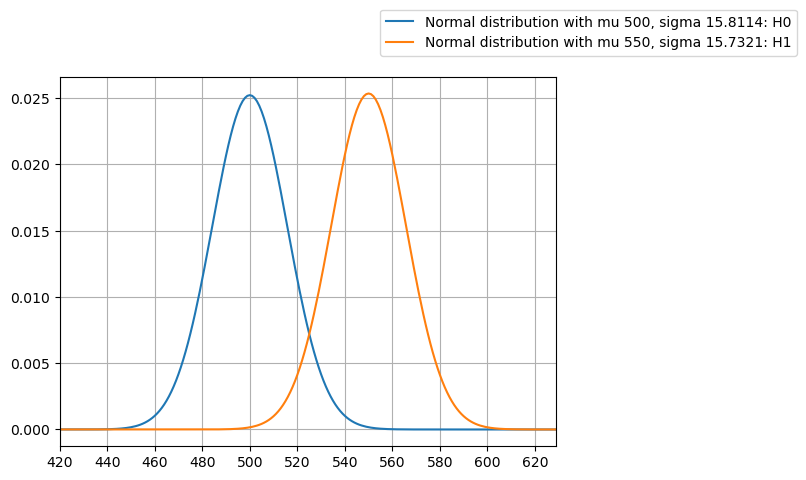

In [159]:
## plot Normal distributions and the corresponding Cumulative Distribution Function with different values of mu and sigma

fig, axs = plt.subplots()

N = 1000
x           = np.arange(1,N)
xFiner      = np.linspace(1,N, max(100, N))

p0 = 0.5
mu0, sigma0   = BinomialMeanSigma(n=N, p=p0)
y_NormalDist0 = NormalnDistribution(xFiner, mu=mu0, sigma=sigma0)
#axs.plot(x,      Binomial_func(x, N=N, p=p0), label="Binomial distribution with p=%g"%p0)
axs.plot(xFiner, y_NormalDist0, label="Normal distribution with mu %g, sigma %g: H0"%(mu0, sigma0))

p1 = 0.55
mu1, sigma1   = BinomialMeanSigma(n=N, p=p1)
y_NormalDist1 = NormalnDistribution(xFiner, mu=mu1, sigma=sigma1)
#axs.plot(x,      Binomial_func(x, N=N, p=p1), label="Binomial distribution with p=%g"%p1)
axs.plot(xFiner, y_NormalDist1, label="Normal distribution with mu %g, sigma %g: H1"%(mu1, sigma1))


x_1SigmaBound_0 = getXRangeForProbability(probability = 0.68, mu=mu0, sigma=sigma0)
x_UpperBound_H1FalsePos = getXUpperBoundForProbability(probability=0.95, mu=mu0, sigma=sigma0)
prob_H1FalseNeg = CDF_NormalDist(x_UpperBound_H1FalsePos, mu=mu0, sigma=sigma0)
print(f"{x_1SigmaBound_0 = }, {x_UpperBound_H1FalsePos = }, {prob_H1FalseNeg = } ")

x_1SigmaBound_1 = getXRangeForProbability(probability = 0.68, mu=mu1, sigma=sigma1)
x_LowerBound_H1FalseNeg = getXLowerBoundForProbability(probability=0.95, mu=mu1, sigma=sigma1)
print(f"{x_1SigmaBound_1 = }, {x_LowerBound_H1FalseNeg = }")

print(f"{getXRangeForProbability(probability = 0.95, mu=mu0, sigma=sigma0) = }")











lines,   lables   = axs.get_legend_handles_labels()
lines_1, lables_1 = axs_1.get_legend_handles_labels()
xAxisLimit = [mu0-5*sigma0, mu1+5*sigma1]
axs.set_xlim(xAxisLimit[0], xAxisLimit[1])
axs.legend(loc='upper right', bbox_to_anchor=(1, 1, 0.5, 0.2))
#axs.legend(lines+lines_1, lables+lables_1, loc='upper right', bbox_to_anchor=(1, 1, 0.5, 0.5))
#axs.set_xticks(np.arange(np.min(xFiner), np.max(xFiner)+1, (xAxisLimit[1] - xAxisLimit[0])/5), )
axs.set_xticks(np.arange(int(xAxisLimit[0]), int(xAxisLimit[1])+1, (xAxisLimit[1] - xAxisLimit[0])//10), )
#axs_1.set_yticks(np.arange(0,1.1, 0.1))
#axs.grid(axis='x')
#axs_1.grid(axis='y')
axs.grid()
fig.show()

In [162]:
p0 = 0.525
#mu0, sigma0   = BinomialMeanSigma(n=1/1000, p=p0)
mu0, sigma0 = p0, 0.0158
print(f"{mu0 = }, {sigma0 = }")
print(f"{getXRangeForProbability(probability = 0.95, mu=mu0, sigma=sigma0) = }")


mu0 = 0.525, sigma0 = 0.0158
getXRangeForProbability(probability = 0.95, mu=mu0, sigma=sigma0) = (0.49389375, 0.5561062499999999)
